# 1. 데이터 수집

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import time
import pandas as pd
import re
import pickle

In [ ]:
service = Service('C:/Users/khb16/Desktop/code/PROJECT/Recommandation/chromedriver.exe')
driver = webdriver.Chrome(service = service)

In [ ]:
pages = [] # 크롤링 오류 확인 위해 page 수 기록
title = []
lyric = []
artist = []
genres = []
writer = []
rank = []
p = re.compile("'(\d+)'")
for page in range(1,26151,50): # 1페이지만 추출(1,51,50), 발라드 gnrCode=GN0100, 댄스 gnrCode=GN0200
    url = "https://www.melon.com/genre/song_list.htm?gnrCode=GN0200#params%5BgnrCode%5D=GN0200&params%5BdtlGnrCode%5D\
                =&params%5BorderBy%5D=POP&params%5BsteadyYn%5D=N&po=pageObj&startIndex={}".format(page) # 댄스 페이지
    driver.get(url)
    
    time.sleep(2) #각자의 컴퓨터 성능에 따라 설정
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # 한 페이지에 있는 50개의 songId 추출
    songid = [] # songid

    for i in range(50):
        data = soup.find_all("a", class_= "btn button_icons type03 song_info")[i].get('href')
        id_ = p.search(str(data)).group(1)
        songid.append(id_)
        f = soup.select('td span.rank')[i].text
        rank.append(f)

    # 해당 songId 입력 후 정보 추출
    for song in songid:
        lyric_url = 'https://www.melon.com/song/detail.htm?songId={}'.format(song)
        driver.get(lyric_url)

        time.sleep(2)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')

        a = soup.select('div.song_name')[0].text[3:].strip() # 제목
        title.append(a)

        try:
            driver.find_element_by_css_selector(".button_more.arrow_d").click() # 가사
            ly = driver.find_element_by_css_selector('.lyric.on')
            b = ly.text
            lyric.append(b)
        except:
            lyric.append('가사없음')
        ar = driver.find_element_by_css_selector(".artist")
        c = ar.text
        artist.append(c)
        d = soup.select('dl.list dd')[2].text # 장르
        genres.append(d)

        try:
            e = soup.select('div.section_prdcr a.artist_name')[0].text # 작사가 1명
            writer.append(e)
        except:
            writer.append('작사가없음')
        pages.append(page)

<ipython-input-136-889516fe7638>:38: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector(".button_more.arrow_d").click() # 가사
<ipython-input-136-889516fe7638>:39: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  ly = driver.find_element_by_css_selector('.lyric.on')
<ipython-input-136-889516fe7638>:44: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  ar = driver.find_element_by_css_selector(".artist")


In [ ]:
col = ['pages','rank','title','lyric','artist','genres','writer']
songlist = pd.DataFrame([pages, rank,title, lyric, artist, genres, writer]).T
songlist.columns = col
songlist

,pages,rank,title,lyric,artist,genres,writer
0,9201,9201,"Trouble (Prod. by 용준형, 김태주)",왜 종일 신경이 네게 꽂혀있는지\n나 요즘 이상해 뭐에 홀린 것 같이\n스쳐 지나갔...,크리샤 츄 (Kriesha Chu),댄스,Good Life
1,9201,9202,파라다이스 (Limited Ver.),Daylight 너무나 눈부셔\n두 발 어디론가 내딛어\nToday 떠나기 좋은 날...,DIA (다이아),댄스,STAINBOYS
2,9201,9203,허망로맨스,너와 함께 하던 순간\n나는 점점 사랑을 느꼈어\n우리 사이는 어느 순간 친구 이상...,쵸쵸우,댄스,뽕필학생
3,9201,9204,24/7,매일매일 들리는 투정들\n일주일을 반복해도 끝이 없는걸\nEveryday yeah\...,TWICE (트와이스),댄스,나연
4,9201,9205,Magic Dream,콩닥콩닥 내 심장이 떨려오는 걸\n부끄럽게 얼굴이 빨개\n자꾸만 빨개져\n어머 어머...,에이프릴 (APRIL),"댄스, 국내드라마",한준
...,...,...,...,...,...,...,...
95,None,9296,None,None,None,None,None
96,None,9297,None,None,None,None,None
97,None,9298,None,None,None,None,None
98,None,9299,None,None,None,None,None


In [ ]:
songlist.to_pickle('dance_1-26150.pkl', protocol = 4) # 발라드는 ballad로 저장

- 데이터 통합

In [ ]:
data1 = pd.read_pickle('/content/drive/MyDrive/5조_파이널PJT/코드/data/ballad_1-20000.pkl')
data2 = pd.read_pickle('/content/drive/MyDrive/5조_파이널PJT/코드/data/ballad_20001-40000_nolyric_18703.pkl')
data3 = pd.read_pickle('/content/drive/MyDrive/5조_파이널PJT/코드/data/ballad_40001-60000.pkl')
data4 = pd.read_pickle('/content/drive/MyDrive/5조_파이널PJT/코드/data/ballad_60000-80000.pkl')
data5 = pd.read_pickle('/content/drive/MyDrive/5조_파이널PJT/코드/data/dance_1-26150_nolyric.pkl')

In [ ]:
df = pd.concat([data1, data2,data3,data4,data5],ignore_index=True)
df.to_pickle('/content/drive/MyDrive/5조_파이널PJT/코드/data/melon.pkl', protocol = 4)

# 2. 전처리

## 2-1. 형태소 분석 및 태깅

- Mecab 설치

In [ ]:
## Mecab 설치

!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

     |████████████████████████████████| 19.4 MB 5.1 MB/s 
     |████████████████████████████████| 448 kB 70.7 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 9.85 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-04-07 14:31:47--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::6b17:d1f5, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loca

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-65a40eb9c4d7>", line 6, in <module>
    get_ipython().system('bash install_mecab-ko_on_colab190912.sh')
  File "/usr/local/lib/python3.7/dist-packages/google/colab/_shell.py", line 102, in system
    output = _system_commands._system_compat(self, *args, **kwargs)  # pylint:disable=protected-access
  File "/usr/local/lib/python3.7/dist-packages/google/colab/_system_commands.py", line 447, in _system_compat
    shell.var_expand(cmd, depth=2), clear_streamed_output=False)
  File "/usr/local/lib/python3.7/dist-packages/google/colab/_system_commands.py", line 199, in _run_command
    return _monitor_process(parent_pty, epoll, p, cmd, update_stdin_widget)
  File "/usr/local/lib/python3.7/dist-packages/google/colab/_system_commands.py", line 229, in _monitor_process
    result 

KeyboardInterrupt: ignored

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
melon = pd.read_pickle('/content/drive/MyDrive/5조_파이널PJT/코드/data/melon.pkl')
melon

,pages,rank,title,lyric,artist,genres,writer
0,1,1,사랑인가 봐,너와 함께 하고 싶은 일들을\n상상하는 게\n요즘 내 일상이 되고\n너의 즐거워하는...,멜로망스,"발라드, 국내드라마",김민석 (멜로망스)
1,1,2,취중고백,뭐하고 있었니 늦었지만\n잠시 나올래\n너의 집 골목에 있는\n놀이터에 앉아 있어\...,김민석 (멜로망스),발라드,김희탐
2,1,3,듣고 싶을까,우리 함께 듣던 그 노랠 듣고 싶을까\n듣고 나서 잠시 날 생각은 할까\n아주 혹시...,MSG워너비(M.O.M),발라드,Dr.JO
3,1,4,사랑은 늘 도망가,눈물이 난다 이 길을 걸으면\n그 사람 손길이 자꾸 생각이 난다\n붙잡지 못하고 가...,임영웅,"발라드, 국내드라마",강태규
4,1,5,언제나 사랑해,둘이 손잡고 걸을 때\n마주 보며 또 웃을 때\n사랑한다 말하지 않아도 알아\n널 ...,케이시 (Kassy),발라드,조영수
...,...,...,...,...,...,...,...
94608,26101,26146,음주운전 하지마 (하지마송part.1),하지마 하지마 음주운전 하지마\n하지마 하지마 음주운전 하지마\n술먹고 운전했었어\...,강건,댄스,강건
94609,26101,26147,All I Want for Christmas Is You (Feat. Edward ...,Merry christmas\n큰마음 먹고 널 위해 준비한 데이트\n나 홀로 집에 ...,"커플다이어리, 아우라 (AOORA), $milli, 윤제","댄스, 인디음악",아우라 (AOORA)
94610,26101,26148,Starlight (inst.),저 떨어지는 별에 빌었어\n지금 네 맘도 나와 똑같기를\n잠든 밤이 지나고 네가 떠...,ENOi,댄스,JYMON
94611,26101,26149,사막별 (inst.),소중한 무언가를 난 또 쫓고 있어\n어떤 모양인지조차\n생각해 볼 순간도 없고\n너...,ENOi,댄스,페이퍼플래닛 (Paper Planet)


In [ ]:
melon['lyric_mecab'] = melon['lyric'].apply(mecab.pos)

In [ ]:
melon['word'] = melon['lyric'].apply(mecab.morphs)

In [ ]:
melon

,pages,rank,title,lyric,artist,genres,writer,lyric_mecab,word
0,1,1,사랑인가 봐,너와 함께 하고 싶은 일들을\n상상하는 게\n요즘 내 일상이 되고\n너의 즐거워하는...,멜로망스,"발라드, 국내드라마",김민석 (멜로망스),"[(너, NP), (와, JKB), (함께, MAG), (하, VV), (고, EC...","[너, 와, 함께, 하, 고, 싶, 은, 일, 들, 을, 상상, 하, 는, 게, 요..."
1,1,2,취중고백,뭐하고 있었니 늦었지만\n잠시 나올래\n너의 집 골목에 있는\n놀이터에 앉아 있어\...,김민석 (멜로망스),발라드,김희탐,"[(뭐, IC), (하, VV), (고, EC), (있, VX), (었, EP), ...","[뭐, 하, 고, 있, 었, 니, 늦, 었, 지만, 잠시, 나올래, 너, 의, 집,..."
2,1,3,듣고 싶을까,우리 함께 듣던 그 노랠 듣고 싶을까\n듣고 나서 잠시 날 생각은 할까\n아주 혹시...,MSG워너비(M.O.M),발라드,Dr.JO,"[(우리, NP), (함께, MAG), (듣, VV), (던, ETM), (그, M...","[우리, 함께, 듣, 던, 그, 노랠, 듣, 고, 싶, 을까, 듣, 고, 나, 서,..."
3,1,4,사랑은 늘 도망가,눈물이 난다 이 길을 걸으면\n그 사람 손길이 자꾸 생각이 난다\n붙잡지 못하고 가...,임영웅,"발라드, 국내드라마",강태규,"[(눈물, NNG), (이, JKS), (난다, VV+EF), (이, MM), (길...","[눈물, 이, 난다, 이, 길, 을, 걸으면, 그, 사람, 손길, 이, 자꾸, 생각..."
4,1,5,언제나 사랑해,둘이 손잡고 걸을 때\n마주 보며 또 웃을 때\n사랑한다 말하지 않아도 알아\n널 ...,케이시 (Kassy),발라드,조영수,"[(둘, NR), (이, JKS), (손잡, VV), (고, EC), (걸, VV)...","[둘, 이, 손잡, 고, 걸, 을, 때, 마주, 보, 며, 또, 웃, 을, 때, 사..."
...,...,...,...,...,...,...,...,...,...
94608,26101,26146,음주운전 하지마 (하지마송part.1),하지마 하지마 음주운전 하지마\n하지마 하지마 음주운전 하지마\n술먹고 운전했었어\...,강건,댄스,강건,"[(하, VV), (지, EC), (마, VX+EC), (하, VV), (지, EC...","[하, 지, 마, 하, 지, 마, 음주운전, 하, 지, 마, 하, 지, 마, 하, ..."
94609,26101,26147,All I Want for Christmas Is You (Feat. Edward ...,Merry christmas\n큰마음 먹고 널 위해 준비한 데이트\n나 홀로 집에 ...,"커플다이어리, 아우라 (AOORA), $milli, 윤제","댄스, 인디음악",아우라 (AOORA),"[(Merry, SL), (christmas, SL), (큰, VA+ETM), (마...","[Merry, christmas, 큰, 마음, 먹, 고, 널, 위해, 준비, 한, ..."
94610,26101,26148,Starlight (inst.),저 떨어지는 별에 빌었어\n지금 네 맘도 나와 똑같기를\n잠든 밤이 지나고 네가 떠...,ENOi,댄스,JYMON,"[(저, NP), (떨어지, VV), (는, ETM), (별, NNG), (에, J...","[저, 떨어지, 는, 별, 에, 빌, 었, 어, 지금, 네, 맘, 도, 나, 와, ..."
94611,26101,26149,사막별 (inst.),소중한 무언가를 난 또 쫓고 있어\n어떤 모양인지조차\n생각해 볼 순간도 없고\n너...,ENOi,댄스,페이퍼플래닛 (Paper Planet),"[(소중, XR), (한, XSA+ETM), (무언가, NNG), (를, JKO),...","[소중, 한, 무언가, 를, 난, 또, 쫓, 고, 있, 어, 어떤, 모양, 인지, ..."


In [ ]:
melon.to_pickle('/content/drive/MyDrive/5조_파이널PJT/코드/data/melon_mecab.pkl')

## 2-2. Word Embedding

### 2-2-1. Word2Vec

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(df['word'], min_count = 1) 

In [ ]:
model.wv.most_similar('사랑', topn = 20)

[('행복', 0.6516521573066711),
 ('이별', 0.6254322528839111),
 ('옹아', 0.6234909892082214),
 ('미안', 0.5984020233154297),
 ('원망', 0.5958678126335144),
 ('말', 0.5914985537528992),
 ('약속', 0.582221269607544),
 ('용서', 0.5737311840057373),
 ('기억', 0.5690634846687317),
 ('새로워야', 0.5533201694488525),
 ('이해', 0.5519946813583374),
 ('후회', 0.5371491312980652),
 ('결혼', 0.534673810005188),
 ('소중', 0.5323776602745056),
 ('스윗소로우', 0.5233602523803711),
 ('고백', 0.5229283571243286),
 ('불행', 0.5206862092018127),
 ('나', 0.5194368362426758),
 ('배신', 0.515627384185791),
 ('생각', 0.5116546750068665)]

In [ ]:
# word dict 생성
word_dict_wv = {}
for word in  model.dictionary.keys():
    word_dict_wv[word] = model.word_vectors[model.dictionary[word]]
print('[Success !] Lengh of word dict... : ', len(word_dict))

설정한 파라미터의미는 다음과 같다. 
- sentences: 토큰화된 리스트 이름
- size(vector_size): 몇 차원의 벡터로 바꿀 것인지
- window: 앞 뒤 몇 단어를 볼 것인지
- min_count: 최소 출현빈도 (이하인 것은 삭제하기)
- workers: 몇 가지 병렬 방식으로 훈련할지 (멀티코어. 동시에 처리할 작업 수)
- iter(epochs): 몇 번 반복학습할 것인지
- sg=1: skip-gram을 사용해라 (sg=0이면 CBOW사용)

### 2-2-2. Glove

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/5조_파이널PJT/코드/data/melon_mecab.pkl')

In [ ]:
# glove 설치
!pip install glove_python_binary

     |████████████████████████████████| 948 kB 5.3 MB/s 


In [ ]:
from glove import Corpus, Glove
corpus = Corpus() 

In [ ]:
# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus.fit(df['word'], window=10) # window = 8 
glove = Glove(no_components=100, learning_rate=0.03) # no_components=100, learning_rate=0.03

# parameter 설정 
glove.fit(corpus.matrix, epochs=20, no_threads=5, verbose=False) # epochs=20, no_threads=5
glove.add_dictionary(corpus.dictionary)

설정한 파라미터의 의미는 다음과 같다. 

* no_components: 몇 차원 백터로 바꿀 것인지
* learning_rate: 너무크면 overshooting, 너무 작으면 실행시간이 너무 오래 걸린다. 최적의 값은 여러번 실행하면서 찾는 것.
* window: 앞 뒤로 몇개의 단어를 볼 것인지 
* epochs: 전체 데이터셋을 몇 번 학습시켜줄 것인지 (학습반복주기) 
* no_threads: 프로세스 내에서 실행되는 흐름단위의 개수(멀티스레드. 병렬실행) 
* verbose: 학습진행상황을 보여줄것인지 (1=True, 0=False)

In [ ]:
glove.most_similar('사랑') #learning_rate=0.01

[('할래요', 0.9982713701239959),
 ('해줘요', 0.9978093167990646),
 ('할께요', 0.9972969561413758),
 ('게요', 0.9971905783369304)]

In [ ]:
glove.most_similar('사랑') #learning_rate=0.03

[('한다고', 0.821894007010279),
 ('한다', 0.8179662835002792),
 ('한다는', 0.8034026948737262),
 ('한다면', 0.7883668710943327)]

In [ ]:
glove.most_similar('사랑') #window=10, learning_rate=0.03

[('한다', 0.829050011195137),
 ('한다고', 0.8233450421209932),
 ('한다는', 0.810641723078519),
 ('한단', 0.7975477367210444)]

In [ ]:
glove.most_similar('사랑') #learning_rate=0.05

[('한다', 0.7565790879022791),
 ('한다고', 0.745687907700494),
 ('한다는', 0.7162856747859455),
 ('Qu', 0.7087674279527009)]

In [ ]:
# word dict 생성
word_dict = {}
for word in  glove.dictionary.keys():
    word_dict[word] = glove.word_vectors[glove.dictionary[word]]
print('[Success !] Lengh of word dict... : ', len(word_dict))

# save word_dict
#with open(DATA_DIR + '/glove_word_dict_128.pickle', 'wb') as f:
#    pickle.dump(word_dict, f)
#print('[Success !] Save word dict!...')

[Success !] Lengh of word dict... :  73474


In [ ]:
word_dict

{'너': array([ 0.2939629 , -0.37987579, -0.45427039, -0.01633985,  0.21495976,
         0.04131581,  0.41212553,  0.18700985, -0.36555717,  0.35295874,
        -0.16607311, -0.18484726, -0.18352725, -0.14029806,  0.35119022,
         0.16367883, -0.42529682,  0.46269915, -0.10474848,  0.43466285,
        -0.15880525,  0.07525798,  0.13410571, -0.60637785,  0.44050878,
         0.1735621 ,  0.46844253, -0.28720149, -0.4132512 , -0.50998301,
         0.47026454, -0.29739845, -0.32298452, -0.21948541,  0.20744672,
        -0.68437481, -0.20995589,  0.51781368,  0.38651343, -0.32204556,
        -0.41117356,  0.31086325,  0.28411629, -0.11961454, -0.23914889,
         0.31294171,  0.36320567,  0.25091987,  0.46228807,  0.08250622,
         0.28886965,  0.05279032,  0.11074257,  0.06711491,  0.36244683,
         0.32832831,  0.53997276,  0.2142488 ,  0.46506872, -0.24649408,
         0.41881976,  0.36171115,  0.34697795,  0.19870889,  0.02593042,
        -0.00654414,  0.47428088, -0.13964597,

In [ ]:
len(word_dict)

73474

In [ ]:
# 임베딩된 단어 벡터 확인
word_dict['사랑']

array([-0.23085911, -0.27285497, -0.01832203, -0.36549405, -0.36093352,
        0.09358964, -0.42645682,  0.15173922,  0.04683451, -0.25474305,
       -0.36916312,  0.19005568,  0.1509075 , -0.31086217,  0.0154911 ,
        0.21218717, -0.34191749,  0.31429561, -0.13259925,  0.33595365,
        0.40241021,  0.08792217,  0.11385064, -0.33019692,  0.22591248,
        0.42169026,  0.27624265,  0.11622167,  0.09216847, -0.22551717,
        0.25164072, -0.34821093, -0.36902686,  0.37055027, -0.1766486 ,
        0.1154849 , -0.10810884,  0.01396482,  0.30068954, -0.31186392,
       -0.3994939 ,  0.30385659, -0.39843349, -0.37647362,  0.01317316,
        0.45205283,  0.55080715, -0.13812738,  0.55392868, -0.39088722,
       -0.34941008,  0.55000388, -0.37937277,  0.07421363, -0.2074617 ,
        0.20005309, -0.31174327,  0.23431445, -0.27415065,  0.31849702,
       -0.44958251,  0.38964761, -0.46787662, -0.34313638, -0.05707925,
        0.42165483, -0.17024729,  0.21266628,  0.33622093,  0.36

In [ ]:
def tsne_plot(model):
  labels = []
  wordvecs = []

  for word in df['word'][0]:
    #for word in words:
    wordvecs.append(model[word])

  tsne_model = TSNE(perplexity=3, n_components = 2, init = 'pca', random_state = 42)
  coordinates = tsne_model.fit_transform(wordvecs)

  x = []
  y = []
  for value in coordinates:
    x.append(value[0])
    y.append(value[1])

  plt.figure(figsize = (8,8))
  for i in range(len(x)):
    plt.scatter(x[i], y[i])
  plt.show()

In [ ]:
plt.annotate(word[i],
              xy = (x[i], y[i]),
              xytext = (2,2),
              textcoords = 'offset points',
              ha = 'right',
              va = 'bottom')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


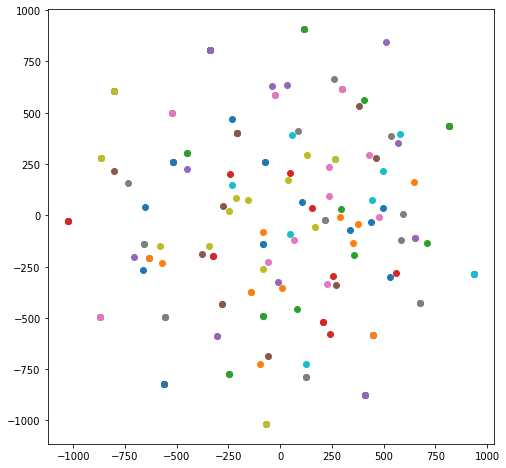

In [ ]:
tsne_plot(word_dict)

- 워드 임베딩 된 벡터로 문장 단위 임베딩

In [ ]:
def sent2vec_glove(tokens, embedding_dim=100):
    '''문장 token 리스트를 받아서 임베딩 시킨다.'''
  
    size = len(tokens)
    matrix = np.zeros((size, embedding_dim))
    word_table = word_dict     # glove word_dict

    for i, token in enumerate(tokens):
        vector = np.array([
            word_table[t] for t in token
            if t in word_table
        ])

        if vector.size != 0:
            final_vector = np.mean(vector, axis=0)
            matrix[i] = final_vector

    return matrix

In [ ]:
sent2vec_glove(df['lyric'])

array([[-0.20185774, -0.21043426, -0.06482552, ..., -0.24471681,
         0.21637077,  0.19484078],
       [-0.19653386, -0.20034704, -0.08714043, ..., -0.23649193,
         0.21977896,  0.19858562],
       [-0.17407586, -0.14958178, -0.12674395, ..., -0.19100651,
         0.09450491,  0.17269734],
       ...,
       [-0.18875318, -0.1628793 , -0.10908315, ..., -0.21421123,
         0.16627586,  0.18674032],
       [-0.19080852, -0.15609216, -0.07466703, ..., -0.19679086,
         0.10694066,  0.19732301],
       [-0.17996869, -0.18274506, -0.08509674, ..., -0.21472538,
         0.19515836,  0.1824993 ]])

### 2-2-3. Fasttext

In [ ]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd

In [ ]:
!pip install gensim

awk: cannot open ./cookie (No such file or directory)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 75.1M  100 75.1M    0     0  29.7M      0  0:00:02  0:00:02 --:--:--  290M


In [ ]:
songdata=pd.read_pickle('/content/drive/MyDrive/melon_mecab.pkl')
lololo=songdata['lyric']
lololo.to_csv('lyric.txt')

In [ ]:
from gensim.models.fasttext import FastText
import gensim.models.word2vec

# path = '/content/wiki_20190620_small.txt'
path = '/content/lyric.txt'
sentences = gensim.models.word2vec.Text8Corpus(path)
model = FastText(sentences, min_count=10, size=50 , window=5) # 데이터셋 / 단어에 대한 최소 빈도수(10회 이하 단어 무시), 고려할 앞뒤 폭(앞뒤 5 단어), vector_size= 학습할 임베딩의 크기(임베딩한 벡터의 차원), epochs=반복 횟수 size=50
print(model)

FastText(vocab=67353, size=50, alpha=0.025)


In [ ]:
model.save('fasttext_model')
saved_model = FastText.load('fasttext_model')

In [ ]:
word_vector = saved_model['너야']
print(word_vector) # 임베딩 벡터 조회

[ 1.3360283   1.891829    2.9017174   4.419221   -4.230584    0.14487423
 -3.8856938  -0.7564123  -1.1278104   3.732915    1.4495976   0.4381081
  3.168609    0.66235393  2.7376795  -0.4019643   2.1139045   1.2476054
 -2.486732    0.9566072   5.256638    0.89220697  2.0669966   2.7798696
 -7.9495754  -0.05369148  1.8494326  -2.6588376  -5.542317   -1.2004942
  2.8670654  -3.632725   -3.3084362   0.31519938 -0.9866051   1.0486801
  2.646117    4.4055767   1.6358656  -0.923598    2.7353086   1.7363158
  3.9794855   2.5175486  -0.82234216 -0.6543729   0.8323554   2.346515
  3.0331173   3.1650007 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
print(model.most_similar(positive=["슬픔"], topn=10)) # 유사성 있는 10개 데이터 추출
print(model.similarity('슬픔', '눈물')) # A와 B의 유사성 수치
print(model.similarity('슬픔', '이별')) # 

[('슬픔들', 0.9463252425193787), ('푸치', 0.9413036108016968), ('슬픔아', 0.9293330311775208), ('슬픔과', 0.9027079939842224), ('슬픔마저도', 0.8886234760284424), ('슬픔인', 0.8827471137046814), ('슬픔마저', 0.8802464604377747), ('슬픔이니', 0.8590008020401001), ('아픔', 0.8387811183929443), ('아픔들도', 0.8216279149055481)]
0.58564013
0.38009533


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
model.most_similar(positive=['이별', '헤어짐'], negative=['사랑']) # A, B와 유사성 있는 단어 추출. negative와는 무관할 것

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('이별일', 0.8060186505317688),
 ('헤어짐의', 0.7919562458992004),
 ('헤어짐에', 0.7855596542358398),
 ('이별하러', 0.7820375561714172),
 ('헤어짐이', 0.7806092500686646),
 ('헤어짐도', 0.7802903652191162),
 ('이별하기', 0.770690381526947),
 ('이별하잔', 0.7699821591377258),
 ('헤어짐이란', 0.7619007229804993),
 ('이별여행', 0.7606485486030579)]

In [ ]:
print(model.similar_by_word('사랑')) # 유사한 단어 검색

[('사랑사랑', 0.946445643901825), ('사랑고백', 0.9354863166809082), ('사랑"', 0.9316359758377075), ('사랑얘기', 0.9294883012771606), ('사랑들', 0.9231353402137756), ('사랑..', 0.9200997948646545), ('사랑)', 0.9186797142028809), ('사랑임을', 0.9185952544212341), ('사랑공식', 0.9173911809921265), ('사랑만도', 0.9166117906570435)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


## 2-3. 데이터 클리닝

- 데이터 클리닝이 나중에 나온 이유는 크롤링 데이터가 노래 가사로 수정할 것이 없을 것이라 예상했으나 2-1,2-2 이후 필요할 것이라 결론지어 함

### 데이터 불러오기

In [ ]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
data = pd.read_pickle('melon.pkl')

### 문잔 구분제거, 대문자를 소문자로 변경

In [ ]:
def preprocessing(x):
    x = x.lower() # 대문자를 소문자로
    x = x.replace('\n', ',') # 문단 구분 '\n' -> ','
    return x

In [ ]:
data.lyric=data.lyric.apply(lambda x:preprocessing(x))
data

,pages,rank,title,lyric,artist,genres,writer
0,1,1,사랑인가 봐,"너와 함께 하고 싶은 일들을,상상하는 게,요즘 내 일상이 되고,너의 즐거워하는 모습...",멜로망스,"발라드, 국내드라마",김민석 (멜로망스)
1,1,2,취중고백,"뭐하고 있었니 늦었지만,잠시 나올래,너의 집 골목에 있는,놀이터에 앉아 있어,친구들...",김민석 (멜로망스),발라드,김희탐
2,1,3,듣고 싶을까,"우리 함께 듣던 그 노랠 듣고 싶을까,듣고 나서 잠시 날 생각은 할까,아주 혹시라도...",MSG워너비(M.O.M),발라드,Dr.JO
3,1,4,사랑은 늘 도망가,"눈물이 난다 이 길을 걸으면,그 사람 손길이 자꾸 생각이 난다,붙잡지 못하고 가슴만...",임영웅,"발라드, 국내드라마",강태규
4,1,5,언제나 사랑해,"둘이 손잡고 걸을 때,마주 보며 또 웃을 때,사랑한다 말하지 않아도 알아,널 만나러...",케이시 (Kassy),발라드,조영수
...,...,...,...,...,...,...,...
94608,26101,26146,음주운전 하지마 (하지마송part.1),"하지마 하지마 음주운전 하지마,하지마 하지마 음주운전 하지마,술먹고 운전했었어,음주...",강건,댄스,강건
94609,26101,26147,All I Want for Christmas Is You (Feat. Edward ...,"merry christmas,큰마음 먹고 널 위해 준비한 데이트,나 홀로 집에 있지...","커플다이어리, 아우라 (AOORA), $milli, 윤제","댄스, 인디음악",아우라 (AOORA)
94610,26101,26148,Starlight (inst.),"저 떨어지는 별에 빌었어,지금 네 맘도 나와 똑같기를,잠든 밤이 지나고 네가 떠오를...",ENOi,댄스,JYMON
94611,26101,26149,사막별 (inst.),"소중한 무언가를 난 또 쫓고 있어,어떤 모양인지조차,생각해 볼 순간도 없고,너에게만...",ENOi,댄스,페이퍼플래닛 (Paper Planet)


### 가사 외 부분(코러스, 가수이름 등 제거)

In [ ]:
# [태민], [코러스] 와 같이 가사에 설명이 들어간 부분 제거
  ## 두개로 나눈 이유: 너무 많이 반복되니 제대로 안 애러뜸
for _ in range(32):
  data['lyric1'], data['lyric2'] = data.lyric.str.split("[", 1).str
  data['lyric2'], data['lyric3'] = data.lyric2.str.split("]", 1).str
  data.fillna(" ", inplace=True)
  data['lyric']= data['lyric1']+ data['lyric3']

for _ in range(32):
  data['lyric1'], data['lyric2'] = data.lyric.str.split("(", 1).str
  data['lyric2'], data['lyric3'] = data.lyric2.str.split(")", 1).str
  data.fillna(" ", inplace=True)
  data['lyric']= data['lyric1']+ data['lyric3']
  data['lyric']

### 특수문자 공백으로 변경(제거)


In [ ]:
def preprocessing1(x):ㅂ
    x = re.sub(r'\([^)]*\)', '', str(x))
    return x

data.lyric = data.lyric.apply(lambda x:preprocessing1(x))
data

,pages,rank,title,lyric,artist,genres,writer,lyric1,lyric2,lyric3
0,1,1,사랑인가 봐,"너와 함께 하고 싶은 일들을,상상하는 게,요즘 내 일상이 되고,너의 즐거워하는 모습...",멜로망스,"발라드, 국내드라마",김민석 (멜로망스),"너와 함께 하고 싶은 일들을,상상하는 게,요즘 내 일상이 되고,너의 즐거워하는 모습...",,
1,1,2,취중고백,"뭐하고 있었니 늦었지만,잠시 나올래,너의 집 골목에 있는,놀이터에 앉아 있어,친구들...",김민석 (멜로망스),발라드,김희탐,"뭐하고 있었니 늦었지만,잠시 나올래,너의 집 골목에 있는,놀이터에 앉아 있어,친구들...",,
2,1,3,듣고 싶을까,"우리 함께 듣던 그 노랠 듣고 싶을까,듣고 나서 잠시 날 생각은 할까,아주 혹시라도...",MSG워너비(M.O.M),발라드,Dr.JO,"우리 함께 듣던 그 노랠 듣고 싶을까,듣고 나서 잠시 날 생각은 할까,아주 혹시라도...",,
3,1,4,사랑은 늘 도망가,"눈물이 난다 이 길을 걸으면,그 사람 손길이 자꾸 생각이 난다,붙잡지 못하고 가슴만...",임영웅,"발라드, 국내드라마",강태규,"눈물이 난다 이 길을 걸으면,그 사람 손길이 자꾸 생각이 난다,붙잡지 못하고 가슴만...",,
4,1,5,언제나 사랑해,"둘이 손잡고 걸을 때,마주 보며 또 웃을 때,사랑한다 말하지 않아도 알아,널 만나러...",케이시 (Kassy),발라드,조영수,"둘이 손잡고 걸을 때,마주 보며 또 웃을 때,사랑한다 말하지 않아도 알아,널 만나러...",,
...,...,...,...,...,...,...,...,...,...,...
94608,26101,26146,음주운전 하지마 (하지마송part.1),"하지마 하지마 음주운전 하지마,하지마 하지마 음주운전 하지마,술먹고 운전했었어,음주...",강건,댄스,강건,"하지마 하지마 음주운전 하지마,하지마 하지마 음주운전 하지마,술먹고 운전했었어,음주...",,
94609,26101,26147,All I Want for Christmas Is You (Feat. Edward ...,"merry christmas,큰마음 먹고 널 위해 준비한 데이트,나 홀로 집에 있지...","커플다이어리, 아우라 (AOORA), $milli, 윤제","댄스, 인디음악",아우라 (AOORA),"merry christmas,큰마음 먹고 널 위해 준비한 데이트,나 홀로 집에 있지...",,
94610,26101,26148,Starlight (inst.),"저 떨어지는 별에 빌었어,지금 네 맘도 나와 똑같기를,잠든 밤이 지나고 네가 떠오를...",ENOi,댄스,JYMON,"저 떨어지는 별에 빌었어,지금 네 맘도 나와 똑같기를,잠든 밤이 지나고 네가 떠오를...",,
94611,26101,26149,사막별 (inst.),"소중한 무언가를 난 또 쫓고 있어,어떤 모양인지조차,생각해 볼 순간도 없고,너에게만...",ENOi,댄스,페이퍼플래닛 (Paper Planet),"소중한 무언가를 난 또 쫓고 있어,어떤 모양인지조차,생각해 볼 순간도 없고,너에게만...",,


### 외국어로만 된 가사 제거

In [ ]:
# 외국어로만 된 가사 찾기
data1 = data.copy()
data1 = data1[~data['lyric'].str.contains(r".*[ㄱ-ㅎㅏ-ㅣ가-힣]+.*")]
#~data['lyric'].str.contains(r".*[ㄱ-ㅎㅏ-ㅣ가-힣]+.*"): 한국어를 포함하지 않은 가사
data1

,pages,rank,title,lyric,artist,genres,writer,lyric1,lyric2,lyric3
1119,1101,1120,Sweet Night,"on my pillow,can’t get me tired,sharing my fra...",V,"발라드, 국내드라마",Hiss noise,"on my pillow,can’t get me tired,sharing my fra...",,
1214,1201,1216,Shiny Star,"twinkle starlight moon,in my heart oh that shi...",경서,발라드,양정승,"twinkle starlight moon,in my heart oh that shi...",,
1869,1851,1873,Just The Two Of Us,"i see the crystal raindrops fall,and the beaut...",어반자카파,발라드,작사가없음,"i see the crystal raindrops fall,and the beaut...",,
1962,1951,1967,Round and round (Feat. 한수지),"see ya,never gone my way,better will someday,n...",헤이즈 (Heize),"발라드, 국내드라마",남혜승,"see ya,never gone my way,better will someday,n...",,
2000,2001,2005,I'm Always by Your Side,"when i'm walk down a road,i don't know well,an...",존박,"발라드, 국내드라마",박세준,"when i'm walk down a road,i don't know well,an...",,
...,...,...,...,...,...,...,...,...,...,...
94481,26001,26005,Already Know,"we already know,had the sparks light,higher th...",Steve Serra,댄스,Steve Serra,"we already know,had the sparks light,higher th...",,
94544,26051,26077,Holla,"holla wanna be with you,don’t even matter,need...",Fanxy Red (팬시레드),댄스,Shaun Kim,"holla wanna be with you,don’t even matter,need...",,
94545,26051,26078,T.O.P,"ima ima be your t.o.p,ima ima be your t.o.p,世界...",Fanxy Red (팬시레드),댄스,Shaun Kim,"ima ima be your t.o.p,ima ima be your t.o.p,世界...",,
94553,26051,26086,Give It up Now,"give it up now oh oh oh feels like,it's been t...",YEVEN,"댄스, 인디음악",신선경,"give it up now oh oh oh feels like,it's been t...",,


In [ ]:
# 외국어 노래 제거
notkorsong = []
for song in data1.index:
  notkorsong.append(song) #외국어 노래 인덱스를 찾기 

data = data.drop(index=notkorsong,axis=0) #외국어 노래 제거

In [ ]:
# 쓸모없어진 열 제거
data = data.drop(['lyric1','lyric2','lyric3'], axis=1)

,pages,rank,title,lyric,artist,genres,writer
0,1,1,사랑인가 봐,"너와 함께 하고 싶은 일들을,상상하는 게,요즘 내 일상이 되고,너의 즐거워하는 모습...",멜로망스,"발라드, 국내드라마",김민석 (멜로망스)
1,1,2,취중고백,"뭐하고 있었니 늦었지만,잠시 나올래,너의 집 골목에 있는,놀이터에 앉아 있어,친구들...",김민석 (멜로망스),발라드,김희탐
2,1,3,듣고 싶을까,"우리 함께 듣던 그 노랠 듣고 싶을까,듣고 나서 잠시 날 생각은 할까,아주 혹시라도...",MSG워너비(M.O.M),발라드,Dr.JO
3,1,4,사랑은 늘 도망가,"눈물이 난다 이 길을 걸으면,그 사람 손길이 자꾸 생각이 난다,붙잡지 못하고 가슴만...",임영웅,"발라드, 국내드라마",강태규
4,1,5,언제나 사랑해,"둘이 손잡고 걸을 때,마주 보며 또 웃을 때,사랑한다 말하지 않아도 알아,널 만나러...",케이시 (Kassy),발라드,조영수
...,...,...,...,...,...,...,...
94608,26101,26146,음주운전 하지마 (하지마송part.1),"하지마 하지마 음주운전 하지마,하지마 하지마 음주운전 하지마,술먹고 운전했었어,음주...",강건,댄스,강건
94609,26101,26147,All I Want for Christmas Is You (Feat. Edward ...,"merry christmas,큰마음 먹고 널 위해 준비한 데이트,나 홀로 집에 있지...","커플다이어리, 아우라 (AOORA), $milli, 윤제","댄스, 인디음악",아우라 (AOORA)
94610,26101,26148,Starlight (inst.),"저 떨어지는 별에 빌었어,지금 네 맘도 나와 똑같기를,잠든 밤이 지나고 네가 떠오를...",ENOi,댄스,JYMON
94611,26101,26149,사막별 (inst.),"소중한 무언가를 난 또 쫓고 있어,어떤 모양인지조차,생각해 볼 순간도 없고,너에게만...",ENOi,댄스,페이퍼플래닛 (Paper Planet)


### 저장하기

In [ ]:
data.to_pickle('melonlyric.pkl', protocol = 4)
#protocol = 4: 매우 큰 개체, 더 많은 종류의 개체 피클링 및 일부 데이터 형식 최적화에 대한 지원